In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain

EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Perform the following EDA:
* The patient demographic data such as gender, age, patient position,etc. (as it is available)
* The x-ray views taken (i.e. view position)
* The number of cases including: 
    * number of pneumonia cases,
    * number of non-pneumonia cases
* The distribution of other diseases that are comorbid with pneumonia
* Number of disease per patient 
* Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

Note: use full NIH data to perform the first a few EDA items and use `sample_labels.csv` for the pixel-level assassements. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [28]:
## Load NIH data
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
all_xray_df.sample(5)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
95405,00025081_019.png,Atelectasis|Pleural_Thickening|Pneumothorax,19,25081,65,M,PA,3056,2544,0.139000,0.139000,NaN
101599,00026988_001.png,No Finding,1,26988,29,M,PA,2021,2021,0.194311,0.194311,NaN
88878,00022034_001.png,No Finding,1,22034,25,F,AP,2500,2048,0.168000,0.168000,NaN
44910,00011548_006.png,Pleural_Thickening,6,11548,45,M,PA,2992,2991,0.143000,0.143000,NaN
56858,00014128_027.png,Effusion|Infiltration|Mass,27,14128,15,F,AP,2500,2048,0.168000,0.168000,NaN


In [29]:
## Load 'sample_labels.csv' data for pixel level assessments
sample_df = pd.read_csv('sample_labels.csv')
sample_df.sample(5)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
2027,00010531_069.png,Infiltration,69,10531,026Y,F,AP,2500,2048,0.168,0.168
3934,00019406_005.png,No Finding,5,19406,055Y,M,PA,2992,2991,0.143,0.143
1561,00008067_018.png,No Finding,18,8067,044Y,M,AP,2500,2048,0.168,0.168
5035,00026740_000.png,No Finding,0,26740,073Y,M,PA,2992,2991,0.143,0.143
4108,00020228_000.png,No Finding,0,20228,026Y,M,PA,2458,2745,0.143,0.143


## Exploratory Data Analysis 

In [30]:
all_xray_df.dtypes

Image Index                     object
Finding Labels                  object
Follow-up #                      int64
Patient ID                       int64
Patient Age                      int64
Patient Gender                  object
View Position                   object
OriginalImage[Width              int64
Height]                          int64
OriginalImagePixelSpacing[x    float64
y]                             float64
Unnamed: 11                    float64
dtype: object

In [31]:
all_xray_df.describe()

,Follow-up #,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,0.0
mean,8.573751,14346.381743,46.901463,2646.078844,2486.438842,0.155649,0.155649,NaN
std,15.406320,8403.876972,16.839923,341.246429,401.268227,0.016174,0.016174,NaN
min,0.000000,1.000000,1.000000,1143.000000,966.000000,0.115000,0.115000,NaN
25%,0.000000,7310.750000,35.000000,2500.000000,2048.000000,0.143000,0.143000,NaN
50%,3.000000,13993.000000,49.000000,2518.000000,2544.000000,0.143000,0.143000,NaN
75%,10.000000,20673.000000,59.000000,2992.000000,2991.000000,0.168000,0.168000,NaN
max,183.000000,30805.000000,414.000000,3827.000000,4715.000000,0.198800,0.198800,NaN


In [32]:
##count missing value
all_xray_df.isna().sum()

Image Index                         0
Finding Labels                      0
Follow-up #                         0
Patient ID                          0
Patient Age                         0
Patient Gender                      0
View Position                       0
OriginalImage[Width                 0
Height]                             0
OriginalImagePixelSpacing[x         0
y]                                  0
Unnamed: 11                    112120
dtype: int64

In [33]:
#drop "Unnamed: 11" column because the values are missing
all_xray_df = all_xray_df.drop(columns="Unnamed: 11", axis = 1)

In [34]:
all_xray_df.describe()

,Follow-up #,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000
mean,8.573751,14346.381743,46.901463,2646.078844,2486.438842,0.155649,0.155649
std,15.406320,8403.876972,16.839923,341.246429,401.268227,0.016174,0.016174
min,0.000000,1.000000,1.000000,1143.000000,966.000000,0.115000,0.115000
25%,0.000000,7310.750000,35.000000,2500.000000,2048.000000,0.143000,0.143000
50%,3.000000,13993.000000,49.000000,2518.000000,2544.000000,0.143000,0.143000
75%,10.000000,20673.000000,59.000000,2992.000000,2991.000000,0.168000,0.168000
max,183.000000,30805.000000,414.000000,3827.000000,4715.000000,0.198800,0.198800


In [35]:
all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].str.split('|').tolist())))
for i in all_labels:
    all_xray_df[i] = all_xray_df['Finding Labels'].map(lambda x : 1 if i in x else 0)

Text(0.5, 1.0, 'Histogram of Patient Age Distribution')

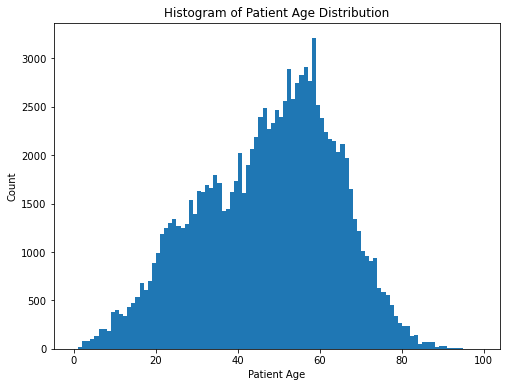

In [36]:
##Patient Age Distribution
plt.figure(figsize = (8, 6))
_ = plt.hist(all_xray_df['Patient Age'], bins = np.arange(0, 100, 1))
plt.xlabel('Patient Age')
plt.ylabel('Count')
plt.title('Histogram of Patient Age Distribution')

##### From the decribed function above and the above histogram one would notice that there patients with age greater than 100. This is likely due to typographical error.

In [37]:
#output patient with age > 100
all_xray_df[all_xray_df['Patient Age'] > 100]

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
20852,00005567_000.png,Effusion|Pneumonia,0,5567,412,M,AP,3056,2544,0.139,...,0,0,0,0,0,0,0,0,1,0
46965,00011973_002.png,Edema,2,11973,414,M,AP,3056,2544,0.139,...,0,0,0,0,0,0,0,0,0,0
48284,00012238_010.png,No Finding,10,12238,148,M,PA,2992,2991,0.143,...,0,0,0,0,0,1,0,0,0,0
55742,00013950_000.png,No Finding,0,13950,148,M,PA,2964,2939,0.143,...,0,0,0,0,0,1,0,0,0,0
58650,00014520_026.png,Infiltration|Mass,26,14520,150,M,PA,2992,2991,0.143,...,0,0,0,1,1,0,0,0,0,0
62929,00015558_000.png,No Finding,0,15558,149,M,PA,2992,2991,0.143,...,0,0,0,0,0,1,0,0,0,0
74884,00018366_044.png,Pneumothorax,44,18366,152,F,PA,2302,2991,0.143,...,0,0,0,0,0,0,0,0,0,1
78795,00019346_000.png,Infiltration,0,19346,151,F,PA,2678,2774,0.143,...,0,0,0,1,0,0,0,0,0,0
84810,00020900_002.png,No Finding,2,20900,411,M,AP,3056,2544,0.139,...,0,0,0,0,0,1,0,0,0,0
85404,00021047_002.png,Mass|Pleural_Thickening,2,21047,412,M,AP,3056,2544,0.139,...,0,0,0,0,1,0,0,1,0,0


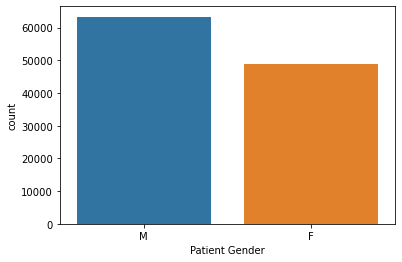

In [38]:
##Patient gender demographic
sns.countplot(all_xray_df['Patient Gender'])

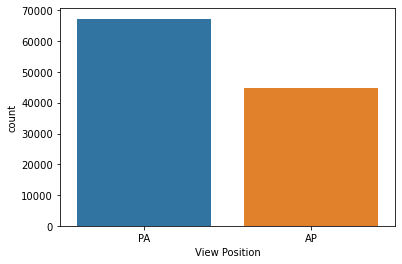

In [39]:
##Patients position
sns.countplot(all_xray_df['View Position'])

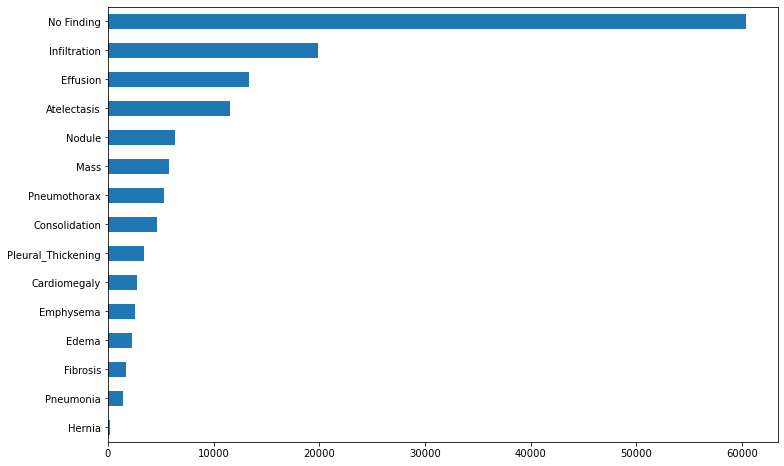

In [40]:
##number of occurence of unique labels
plt.figure(figsize = (12, 8))
all_xray_df[all_labels].sum().sort_values(ascending = True).plot(kind = 'barh')

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3695: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


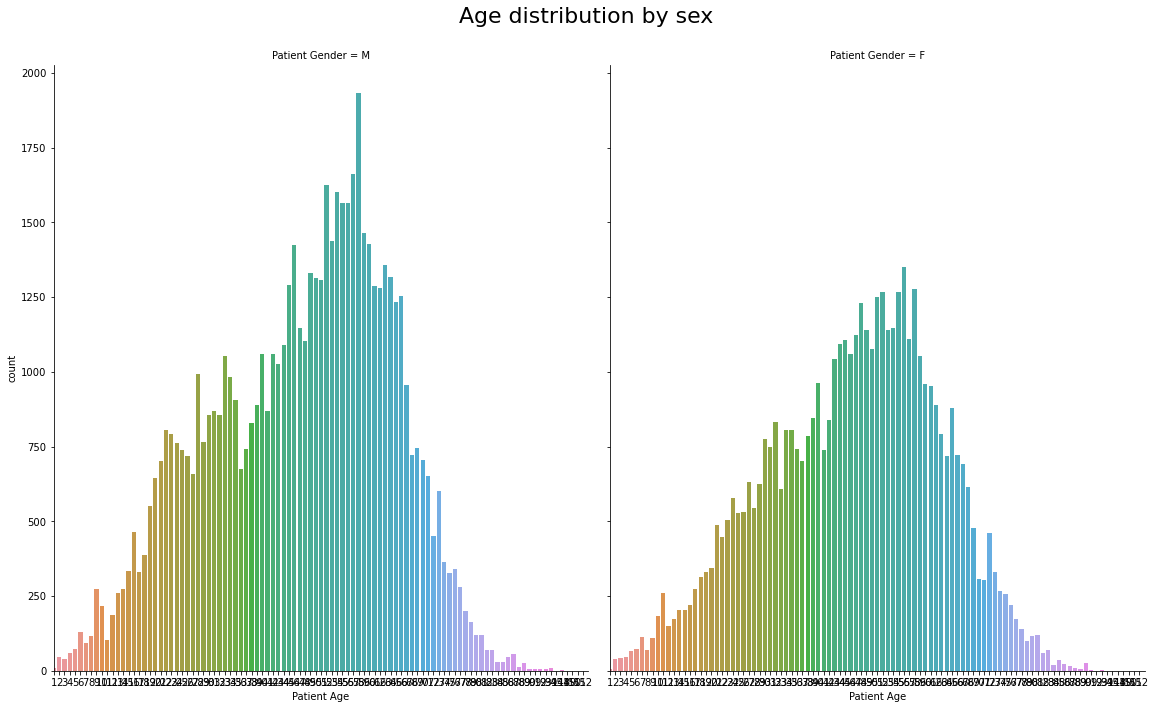

In [41]:
##Distribution of age by sex
ageBySex = sns.catplot(x = 'Patient Age', col = 'Patient Gender', data = all_xray_df, kind = 'count', size = 10, aspect = 0.8)
ageBySex.axes[0,0].set_xlim(0,100)
ageBySex.axes[0, 0].set_xticks(np.arange(0, 100, 1));

ageBySex.fig.suptitle('Age distribution by sex',fontsize=22);
ageBySex.fig.subplots_adjust(top=.9)

Text(0.5, 1.05, 'Correlation between labels')

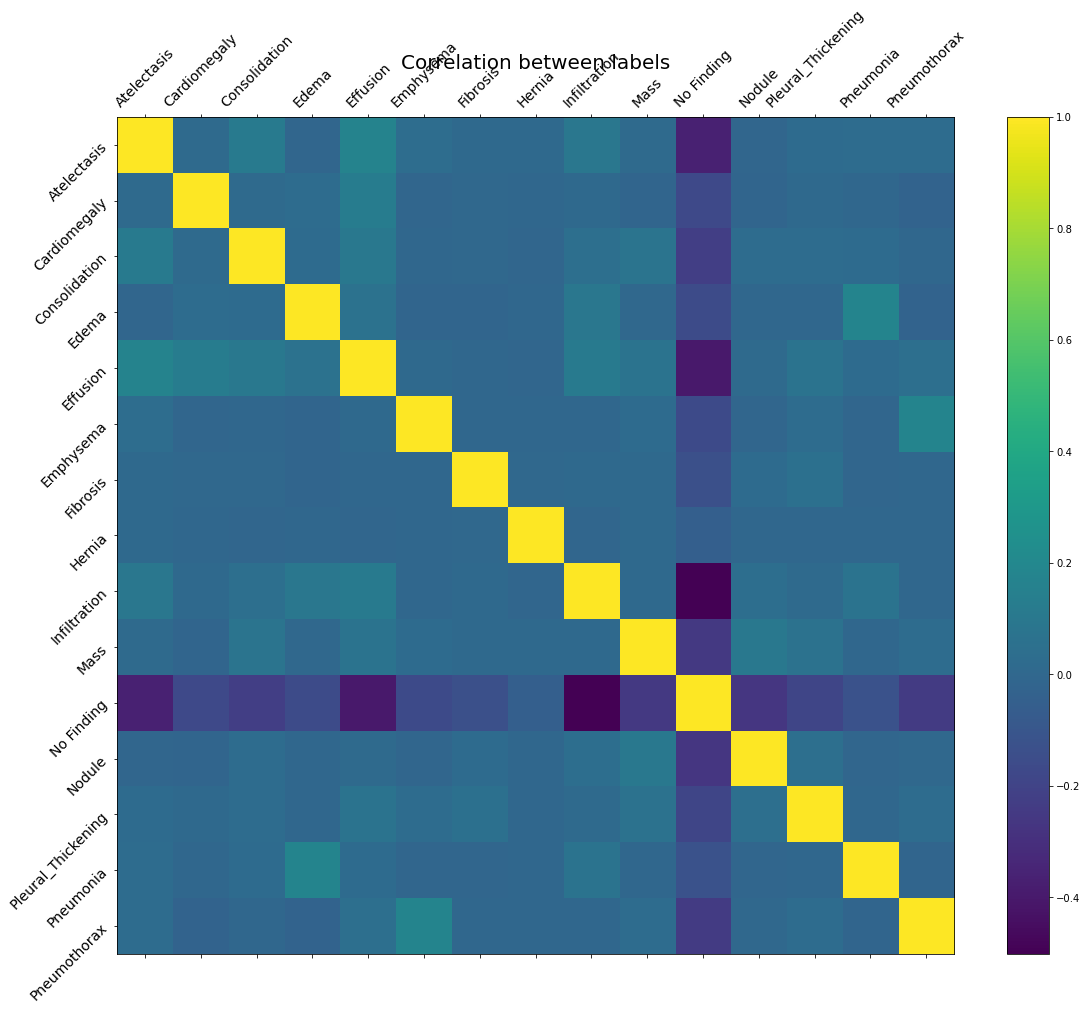

In [42]:
#Correlation
f = plt.figure(figsize = (19, 15))
plt.matshow(all_xray_df[all_labels].corr(), fignum=f.number)
plt.xticks(ticks = range(all_xray_df[all_labels].shape[1]), labels=all_xray_df[all_labels].columns, fontsize = 14, rotation = 45)
plt.yticks(ticks = range(all_xray_df[all_labels].shape[1]), labels=all_xray_df[all_labels].columns, fontsize = 14, rotation = 45)
cb = plt.colorbar()
plt.title('Correlation between labels', fontsize = 20)

## Exploratory data analysis  on pneumonia cases

In [43]:
pneumoniaCount = all_xray_df.groupby('Pneumonia')['Pneumonia'].count()
print ("Number of patients with Pneumonia are {pneumonia}, while number of patients without Pneumonia are {nonPneumonia}".format(pneumonia = pneumoniaCount[1], nonPneumonia = pneumoniaCount[0]))

Number of patients with Pneumonia are 1431, while number of patients without Pneumonia are 110689


Text(0.5, 1.0, 'Pneumonia Vs non-pneumonia patients')

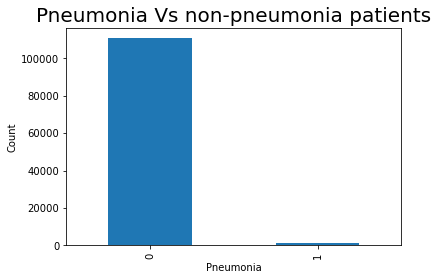

In [44]:
all_xray_df.groupby('Pneumonia')['Pneumonia'].count().plot(kind = 'bar')
plt.ylabel('Count')
plt.title('Pneumonia Vs non-pneumonia patients', fontsize = 20)

In [45]:
all_xray_df.groupby('Pneumonia')['Patient Gender'].describe()

,count,unique,top,freq
Pneumonia,,,,
0,110689,2,M,62502
1,1431,2,M,838


In [46]:
all_xray_df.groupby('Pneumonia')['Patient Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pneumonia,,,,,,,,
0,110689.0,46.926985,16.791759,1.0,35.0,49.0,59.0,414.0
1,1431.0,44.927324,20.129866,2.0,31.0,46.0,59.0,412.0


In [47]:
pneumonia_df = all_xray_df[all_xray_df['Pneumonia'] == 1]
non_pneumonia_df = all_xray_df[all_xray_df['Pneumonia'] == 0]

Text(0.5, 1.0, 'Distribution of other diseases with pneumonia')

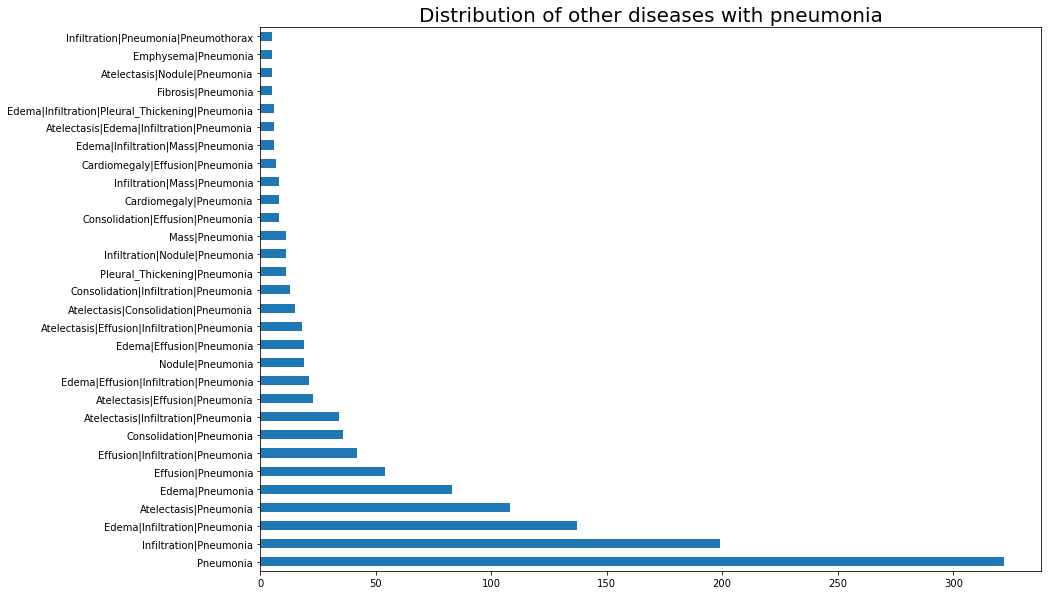

In [48]:
plt.figure(figsize=(14, 10))
pneumonia_df['Finding Labels'].value_counts()[:30].plot(kind = 'barh')
plt.title('Distribution of other diseases with pneumonia', fontsize = 20)

Text(0.5, 1.0, 'Pneumonia Gender Distribution')

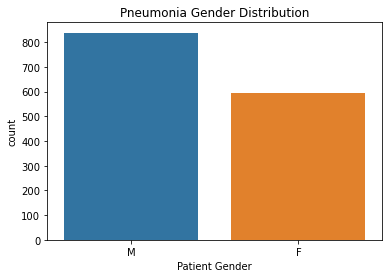

In [49]:
sns.countplot(pneumonia_df['Patient Gender'])
plt.title('Pneumonia Gender Distribution')

Text(0.5, 1.0, 'Pneumonia Age distribution')

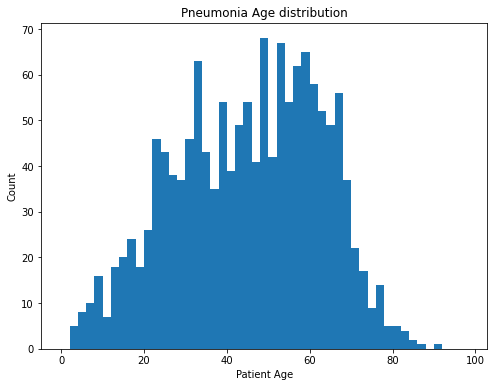

In [50]:
plt.figure(figsize = (8, 6))
_ = plt.hist(pneumonia_df['Patient Age'], bins = np.arange(0, 100, 2))
plt.xlabel('Patient Age')
plt.ylabel('Count')
plt.title('Pneumonia Age distribution')

## Pixel-level assessments  healthy & disease images

In [51]:
img_list = glob('*.dcm')

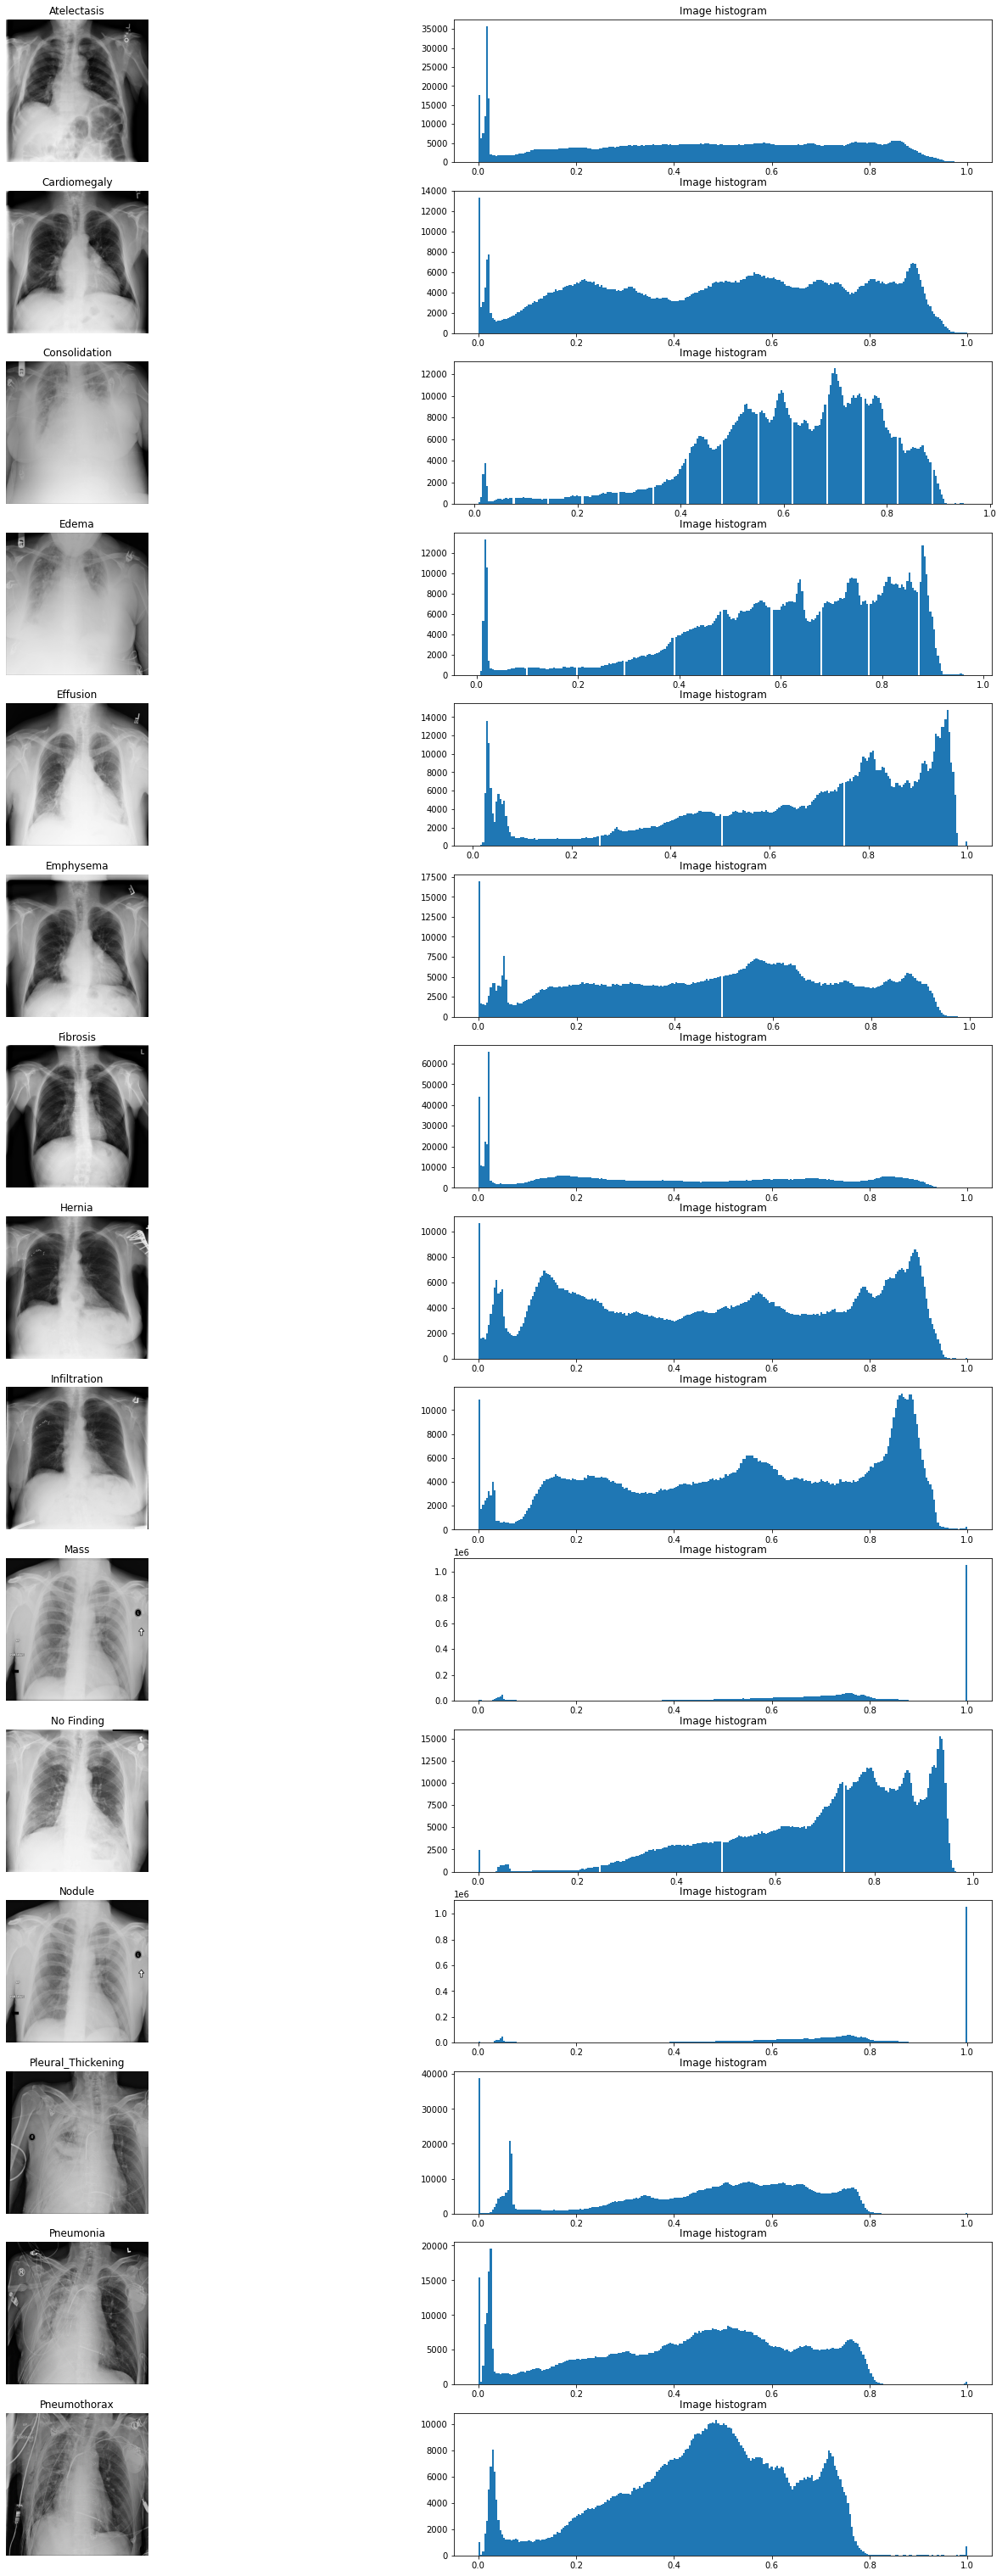

In [52]:
path = "/data/images_001/images/"
fig, axs = plt.subplots(len(all_labels), 2, figsize = (25, 55))
i = 0
for disease in all_labels:
    img_name = all_xray_df[all_xray_df[disease] == 1]['Image Index'].reset_index(drop = True)[0]
    img_path = os.path.join(path, img_name)
    if not os.path.exists(img_path):  continue
    img = plt.imread(path + img_name)
    axs[i, 0].imshow(img, cmap = 'gray')
    axs[i, 0].set_title(disease)
    axs[i, 1].hist(img.ravel(), bins = 256)
    axs[i, 1].set_title('Image histogram')
    axs[i, 0].axis('off')
    i += 1

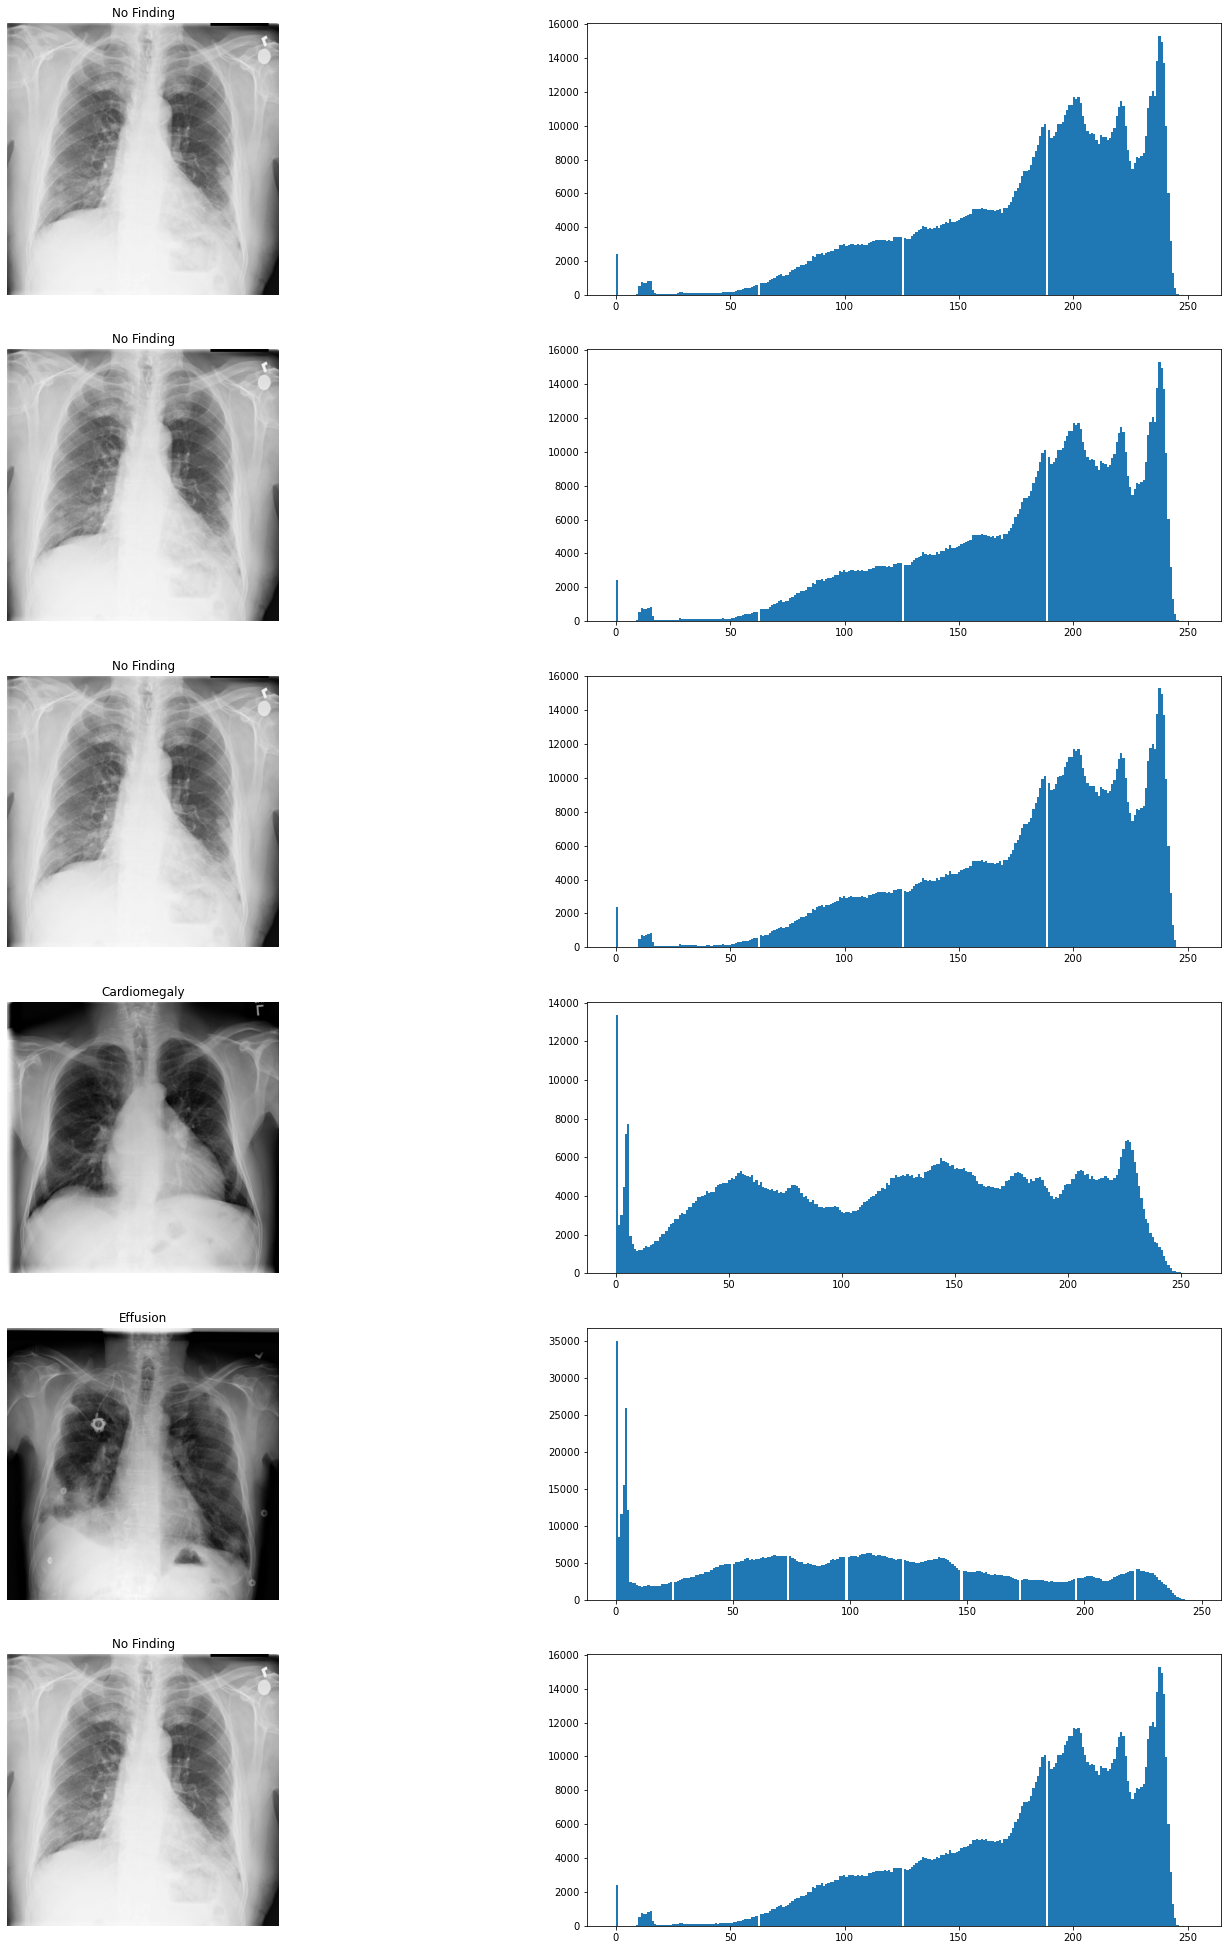

In [53]:
import pydicom
fig, axs = plt.subplots(len(img_list), 2, figsize = (25, 35))
for i, path in enumerate(img_list):
    dcm = pydicom.dcmread(path)
    label = dcm.StudyDescription
    axs[i, 0].imshow(dcm.pixel_array, cmap = 'gray')
    axs[i, 0].set_title(label)
    axs[i, 1].hist(dcm.pixel_array.ravel(), bins = 256)
    axs[i, 0].axis('off')

## Comparison among diseases.

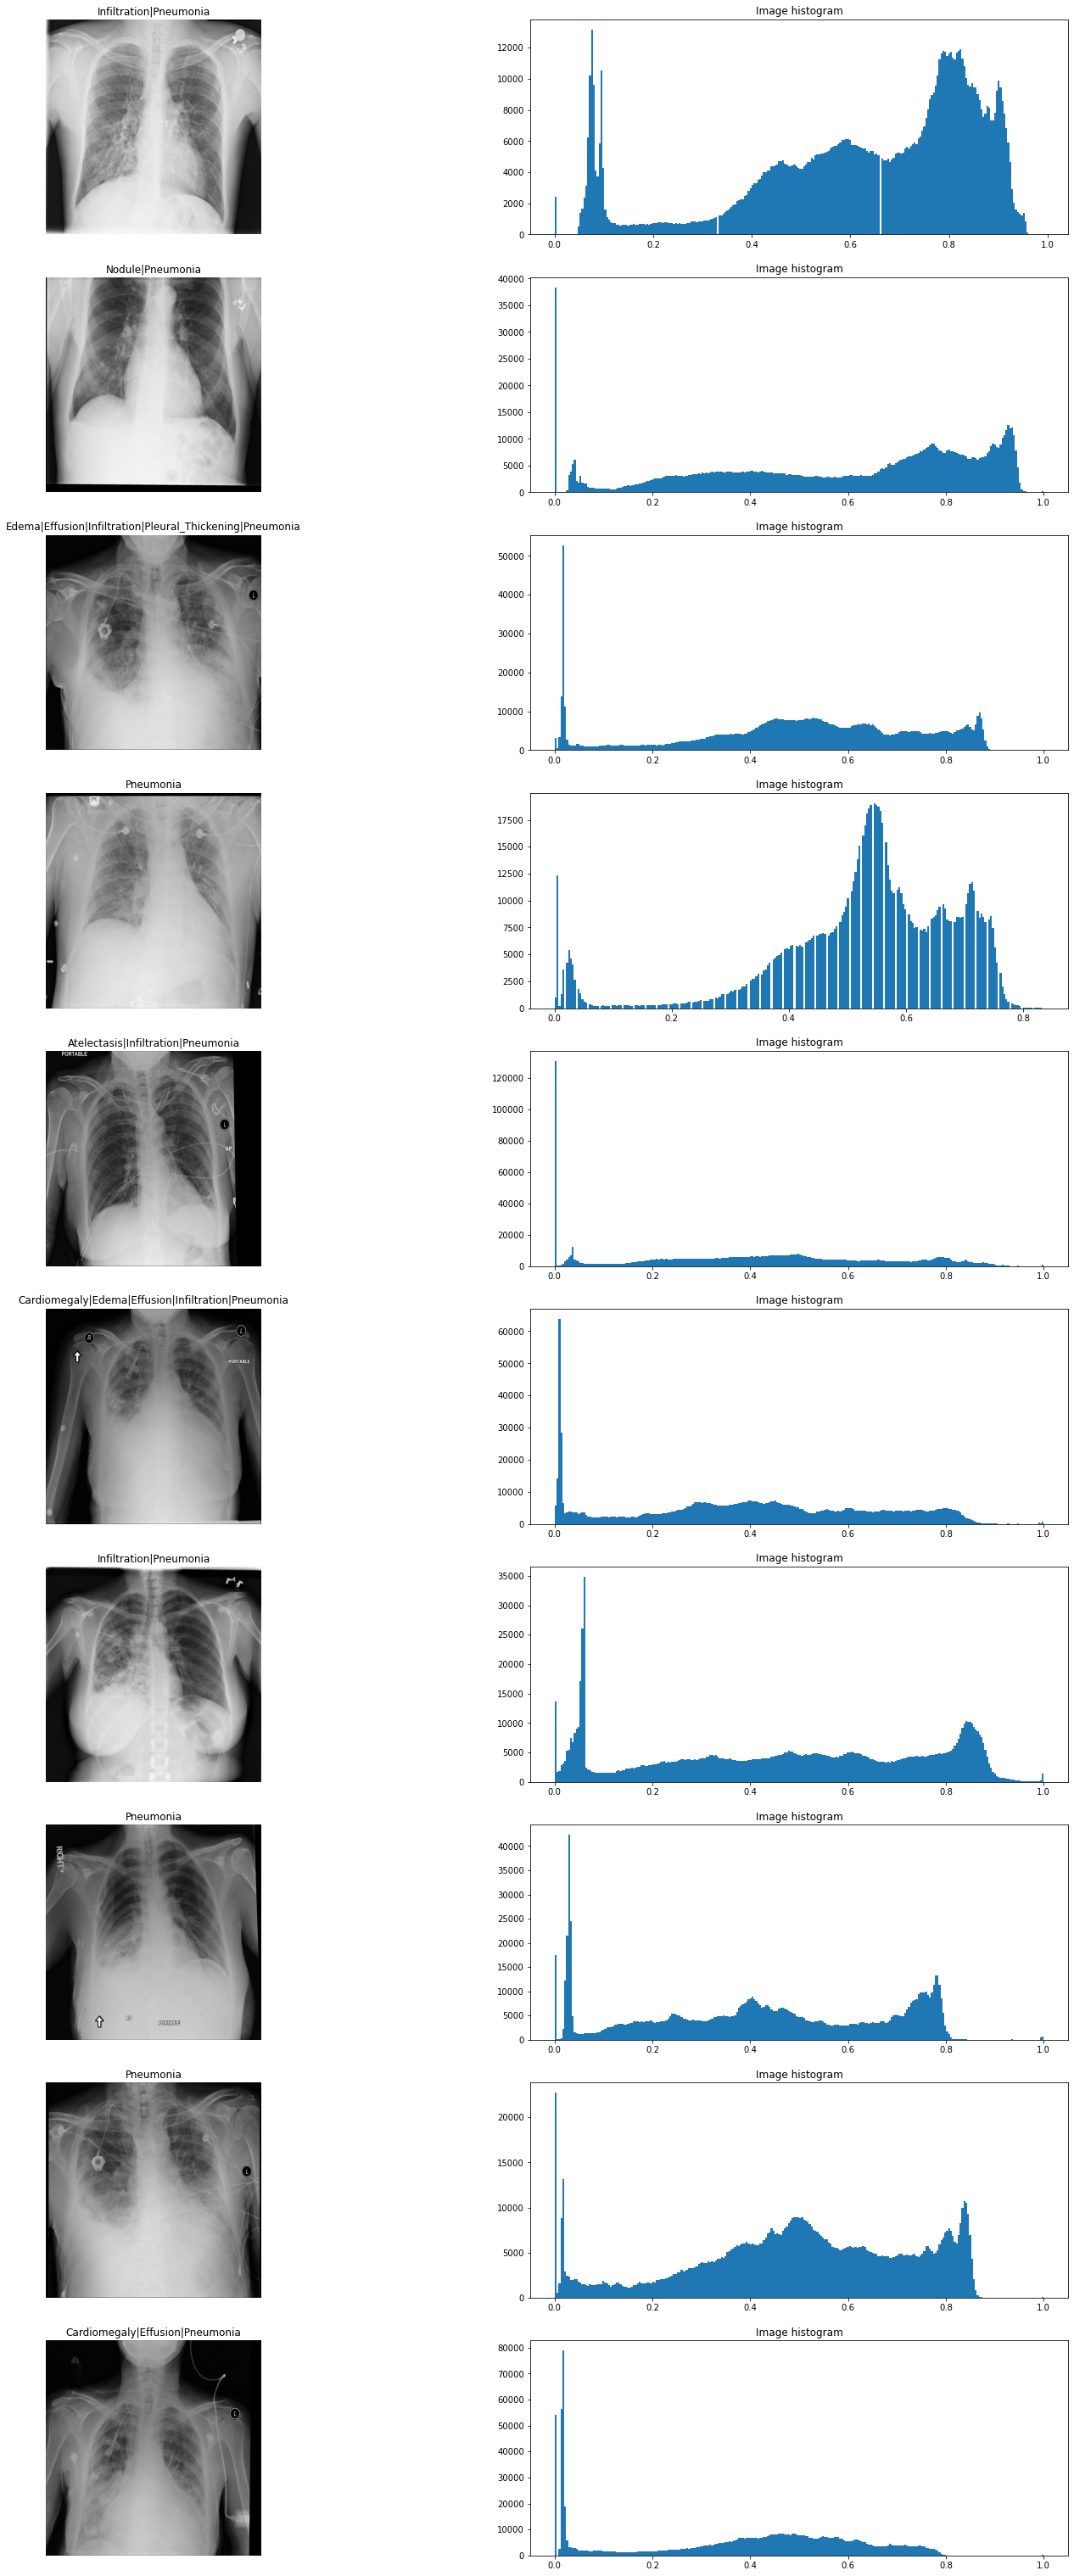

In [54]:
path = "/data/images_001/images/"
fig, axs = plt.subplots(10, 2, figsize = (25, 55))
i = 0
for idx, row in pneumonia_df[:20].sample(10).iterrows():
    img_path = os.path.join(path, row['Image Index'])
    if not os.path.exists(img_path):  continue
    img = plt.imread(img_path)
    label = row['Finding Labels']
    axs[i, 0].imshow(img, cmap = 'gray')
    axs[i, 0].set_title(label)
    axs[i, 1].hist(img.ravel(), bins = 256)
    axs[i, 1].set_title('Image histogram')
    axs[i, 0].axis('off')
    i += 1